5 Data Teratas:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II



Informasi Umum:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                            

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351



Jumlah Missing Values Tiap Kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Jumlah Nilai Unik per Kolom:
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                 

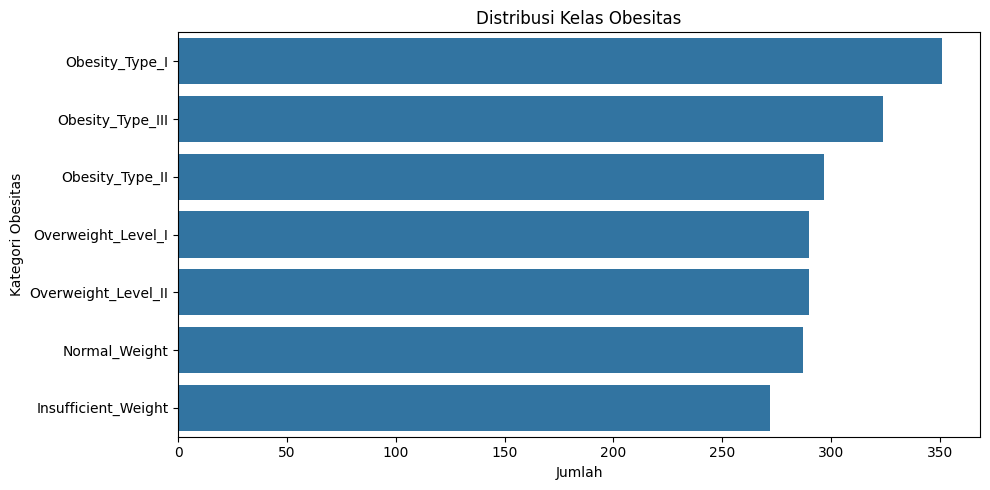

<Figure size 1500x1000 with 0 Axes>

In [1]:
# 1. Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset
df = pd.read_csv('/content/drive/MyDrive/obesity/ObesityDataSet.csv')

# 3. Tampilkan beberapa baris pertama
print("5 Data Teratas:")
display(df.head())

# 4. Informasi umum dataset
print("\nInformasi Umum:")
df.info()

print("\nStatistik Deskriptif:")
display(df.describe(include='all'))

# 5. Cek missing values
print("\nJumlah Missing Values Tiap Kolom:")
print(df.isnull().sum())

# 6. Cek unique values per kolom
print("\nJumlah Nilai Unik per Kolom:")
print(df.nunique())

# 7. Cek data duplikat
print(f"\nJumlah Data Duplikat: {df.duplicated().sum()}")

# 8. Cek keseimbangan data target
plt.figure(figsize=(10,5))
sns.countplot(y='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kelas Obesitas')
plt.xlabel('Jumlah')
plt.ylabel('Kategori Obesitas')
plt.tight_layout()
plt.show()

# 9. Boxplot untuk deteksi outlier
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()


In [3]:
# Kesimpulan EDA
kesimpulan = """
 **KESIMPULAN EXPLORATORY DATA ANALYSIS (EDA)**

1. **Struktur Dataset**:
   - Dataset memiliki 2111 baris dan 17 kolom.
   - Terdapat kombinasi fitur bertipe kategorikal, biner, integer, dan kontinu.

2. **Kebersihan Data**:
   - Tidak ditemukan missing values di seluruh kolom.
   - Tidak ada data duplikat dalam dataset.

3. **Distribusi Target**:
   - Target `NObeyesdad` terdiri dari 7 kelas obesitas.
   - Distribusi target tidak seimbang. Beberapa kelas seperti `Obesity Type I` dan `Normal Weight` memiliki jumlah data lebih besar dibanding kelas lain seperti `Insufficient Weight`.

4. **Outlier**:
   - Terdapat kemungkinan outlier pada fitur numerik seperti `Weight`, `Age`, dan `TUE` berdasarkan visualisasi boxplot.
   - Outlier ini mungkin perlu ditangani pada tahap preprocessing jika memengaruhi performa model.

5. **Insight Awal**:
   - Beberapa fitur seperti `family_history_with_overweight`, `FAVC`, `SMOKE`, dan `SCC` adalah biner dan bisa dikonversi ke 0/1.
   - Fitur `MTRANS`, `CALC`, `CAEC`, dan `Gender` adalah kategorikal dan perlu encoding sebelum digunakan untuk training model.
"""

from IPython.display import Markdown
display(Markdown(kesimpulan))



 **KESIMPULAN EXPLORATORY DATA ANALYSIS (EDA)**

1. **Struktur Dataset**:
   - Dataset memiliki 2111 baris dan 17 kolom.
   - Terdapat kombinasi fitur bertipe kategorikal, biner, integer, dan kontinu.

2. **Kebersihan Data**:
   - Tidak ditemukan missing values di seluruh kolom.
   - Tidak ada data duplikat dalam dataset.

3. **Distribusi Target**:
   - Target `NObeyesdad` terdiri dari 7 kelas obesitas.
   - Distribusi target tidak seimbang. Beberapa kelas seperti `Obesity Type I` dan `Normal Weight` memiliki jumlah data lebih besar dibanding kelas lain seperti `Insufficient Weight`.

4. **Outlier**:
   - Terdapat kemungkinan outlier pada fitur numerik seperti `Weight`, `Age`, dan `TUE` berdasarkan visualisasi boxplot.
   - Outlier ini mungkin perlu ditangani pada tahap preprocessing jika memengaruhi performa model.

5. **Insight Awal**:
   - Beberapa fitur seperti `family_history_with_overweight`, `FAVC`, `SMOKE`, dan `SCC` adalah biner dan bisa dikonversi ke 0/1.
   - Fitur `MTRANS`, `CALC`, `CAEC`, dan `Gender` adalah kategorikal dan perlu encoding sebelum digunakan untuk training model.
